In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


<font color = 'teal'>1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained? <font />

In [2]:
#load the json file into pandas dataframe 
df =  pd.read_json('ultimate_data_challenge.json')
#Printing the first five rows of dataframe 
df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
#printing the shape of dataframe 
print(df.shape)

(50000, 12)


In [4]:
#Using info() getting the inormation of nan values of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
#Drop the nan values from the dataframe 
df = df.dropna()
#After removing the nan values printing the shape of dataframe
print(df.shape)

(41445, 12)


In [6]:
print(df.columns)

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')


In [7]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [8]:
#Getting the city names from the dataframe 
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

This dataframe contains data of users from three cities, King's Landing, Astapor and Winterfell.

In [9]:
#using groupby, the dataframe is grouped by city column 
df.groupby('city').sum()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
city,,,,,,,,
Astapor,30274,62558.6,14644.26,136141.6,5406.0,820026.9,69588.15,64772.5
King's Landing,24150,41312.2,9404.35,89524.8,3708.0,557037.4,50143.68,42575.4
Winterfell,53734,86847.5,20455.93,143140.6,6805.0,1161644.9,106559.79,90611.9


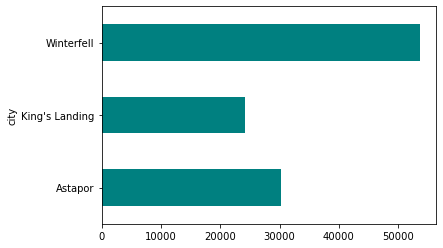

In [10]:
df.groupby('city').trips_in_first_30_days.sum().plot.barh(color= 'teal')

We can observe that Winterfall is having more trips in first 30 days. And the driver rating given by the users  and ultimate black users in Winterfall are high comparing other two cities. King'sLanding is having less numbers of trips in first thirty days.

In [11]:
# Create a dataframe retained_users and take the users who retained(had trips in last 30 days) from the dataframe df 
retained_users =  df [df['trips_in_first_30_days'] != 0]
retained_users.shape

(29921, 12)

In [12]:
# Calculating the fraction of users retained 
Fraction_retained = len(retained_users['trips_in_first_30_days']) / len(df['trips_in_first_30_days']) *100
print("The fraction of users retained : ",Fraction_retained ,"%")

The fraction of users retained :  72.19447460489806 %


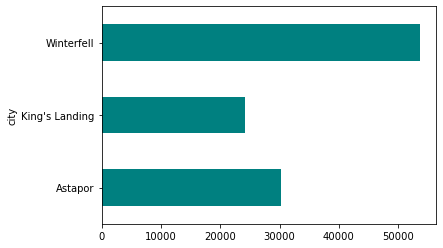

In [13]:
retained_users.groupby('city').trips_in_first_30_days.sum().plot.barh(color= 'teal')

The retained users are more in Winterfell the same is observed in original dataframe df also .

In [14]:
retained_users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


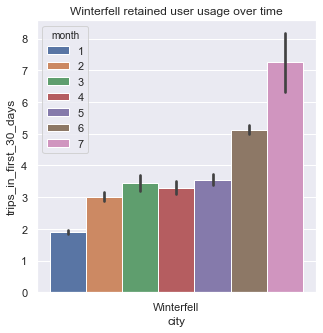

In [15]:
Winterfell = retained_users[(retained_users['city']=='Winterfell')]
Winterfell.index = pd.to_datetime(Winterfell['last_trip_date'])
Winterfell['month'] = Winterfell.index.month
sns.set(rc={'figure.figsize': (5,5)})
sns.barplot(x='city',y='trips_in_first_30_days',data=Winterfell,hue ='month')
plt.title("Winterfell retained user usage over time")
plt.show()

If we consider winterfell there is a linear increase in trips in first 30 days. And in 7th month the surge is very high.

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


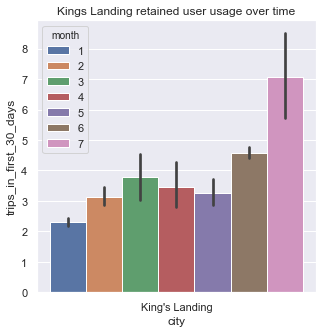

In [16]:
Kings_Landing = retained_users[(retained_users['city'] == "King's Landing")]
Kings_Landing.index = pd.to_datetime(Kings_Landing['last_trip_date'])
Kings_Landing['month'] = Kings_Landing.index.month
sns.set(rc={'figure.figsize': (5,5)})
sns.barplot(x='city',y='trips_in_first_30_days',data=Kings_Landing,hue ='month')
plt.title("Kings Landing retained user usage over time")
plt.show()

Same increasing is observed in Kind's Landing trips also.

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


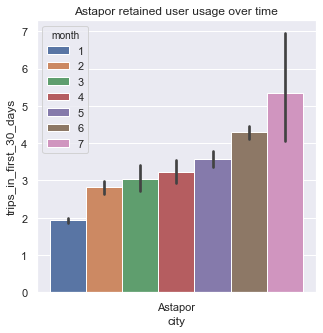

In [17]:
Astapor = retained_users[(retained_users['city'] == "Astapor")]
Astapor.index = pd.to_datetime(Astapor['last_trip_date'])
Astapor['month'] = Astapor.index.month
sns.set(rc={'figure.figsize': (5,5)})
sns.barplot(x='city',y='trips_in_first_30_days',data=Astapor,hue ='month')
plt.title("Astapor retained user usage over time")
plt.show()

In all three cities we can observe an increasing pattern in trips in first 30 days. 

Converting the retained_users into datetime index 

In [18]:
retained_users['active'] = (retained_users['last_trip_date'] >= '2014-06-01') & (retained_users['last_trip_date'] <= '2014-07-01')
retained_users.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
retained_users.index = pd.to_datetime(retained_users['last_trip_date'])
retained_users.drop(columns=['last_trip_date'], inplace = True)
retained_users['signup_date'] = pd.to_datetime(retained_users['signup_date'])
retained_users.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
last_trip_date,,,,,,,,,,,,
2014-06-17,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True
2014-01-07,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False
2014-06-29,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True
2014-03-15,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False
2014-06-06,Winterfell,2,2014-01-09,3.5,1.00,iPhone,0.0,True,100.0,10.56,5.0,True


<font color = 'teal'>2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.<font />

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
retained_users.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29921 entries, 2014-06-17 to 2014-01-15
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    29921 non-null  object        
 1   trips_in_first_30_days  29921 non-null  int64         
 2   signup_date             29921 non-null  datetime64[ns]
 3   avg_rating_of_driver    29921 non-null  float64       
 4   avg_surge               29921 non-null  float64       
 5   phone                   29921 non-null  object        
 6   surge_pct               29921 non-null  float64       
 7   ultimate_black_user     29921 non-null  bool          
 8   weekday_pct             29921 non-null  float64       
 9   avg_dist                29921 non-null  float64       
 10  avg_rating_by_driver    29921 non-null  float64       
 11  active                  29921 non-null  bool          
dtypes: bool(2), datetime64[ns](1)

In [30]:
X =  retained_users.drop(columns = ['city','active','phone','signup_date'])
y = retained_users[['active']]



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=20, 
                                       max_features=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100)
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred_prob = Rf.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" %roc_auc_score(y_test, y_pred_prob))

print("The confusion matrix :",confusion_matrix(y_test, y_pred))
print("The Classification report :",classification_report(y_test, y_pred))

ROC AUC score is: 0.840
[[2764  695]
 [ 725 1801]]
              precision    recall  f1-score   support

       False       0.79      0.80      0.80      3459
        True       0.72      0.71      0.72      2526

    accuracy                           0.76      5985
   macro avg       0.76      0.76      0.76      5985
weighted avg       0.76      0.76      0.76      5985



In [37]:
pd.DataFrame(Rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.254755
weekday_pct,0.175762
surge_pct,0.170946
avg_dist,0.133869
avg_surge,0.097011
ultimate_black_user,0.058063
trips_in_first_30_days,0.056409
avg_rating_of_driver,0.053186


The three most important features are average rating by driver, the percent of the user’s trips occurring during a weekday and the percent of trips taken with surge multiplier > 1

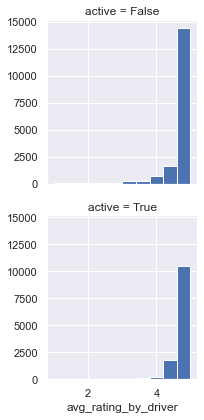

In [40]:
g = sns.FacetGrid(retained_users, row='active')
g = g.map(plt.hist, "avg_rating_by_driver")

We can see only a slight correlation here.

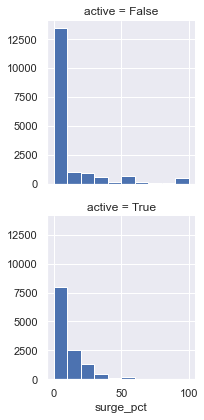

In [42]:
g = sns.FacetGrid(retained_users, row='active')
g = g.map(plt.hist, "surge_pct")

The second most important feature was the percent of trips taken with surge multiplier > 1. We know that this is very slightly positively correlated with active state of user.

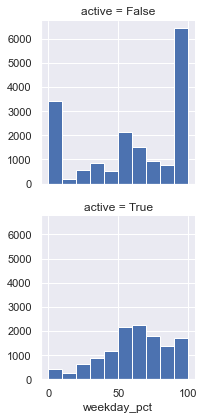

In [43]:
g = sns.FacetGrid(retained_users, row='active')
g = g.map(plt.hist, "weekday_pct")

The third important feature is the percent of the user’s trips occurring during a weekday. The inactive user show a far distribution than active users.